<a href="https://colab.research.google.com/github/yahuy1/CSE432/blob/main/HW4_Coding_nguyenhg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW4: Advanced challenge for Linear regression

Please read the slides of chapter 3.2 and finish this assignment.

You can find the demo for the linear regression with code in the following link
https://colab.research.google.com/drive/1ONTJ_L_4CMcyJcXdCeljRntazdW1zjW6?usp=sharing

Please follow this example to finish this assignment.

## The new equation and new dataset
In this homework, you are given a new dataset. Please run the following code to check the data you got.


Based on the dataset, it seems that we should use a new equation (new model) to fit the data. In this question, the proposed model is a polynomial model, but you can also use what you learned for linear regression for finding the best parameters.

Let's use the following polynomial equation as the model:

y=ϴ0*x^2+ϴ1*x+ϴ2

at first we set ϴ0=0, ϴ1=0, ϴ2=0

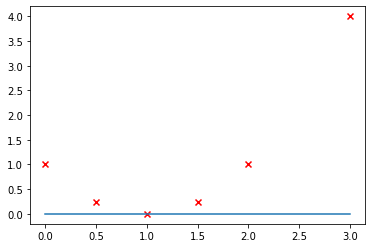

In [13]:
import matplotlib.pyplot as plt
import numpy as np


x_GT = np.array([0, 0.5, 1, 1.5, 2, 3])
y_GT = np.array([1, 0.25, 0, 0.25, 1, 4])
plt.scatter(x_GT, y_GT,marker='x', color='r')
#plt.show()

Th0=0  #ϴ0
Th1=0   #ϴ1
Th2=0   #ϴ2
xpoints = np.linspace(0, 3, 100)

Y_p=Th0*xpoints*xpoints+Th1*xpoints+Th2

plt.plot(xpoints, Y_p)
plt.show()

Based on the linear regression algorithm, you need first obtain the data and propose a model, which we have done in the above. Now we need to calculate the l2-loss and use gradient descent to calculate the parameters: ϴ0, ϴ1, ϴ2

## Please design the gradient descent function for each step and the loss function by completing the following code

Please read the slides of chapter 3.2 to implement the code.

This function is just one step of the gradient descent. And this function will be called several time in the last code block, where we will run this function 6000 times in the "for" loop.

**Tips**: write down the equations for gradient decent first by following the slides of chapter 3.2

In [12]:
def GradientDecent(Th0,Th1,Th2,x_GT,y_GT,Lr):
  
  ########################
  # Input your code here #
  ########################
    
  PartialTh0 = np.sum(2 * (Th0 * x_GT**2 + Th1 * x_GT + Th2 - y_GT) * x_GT**2)
  PartialTh1 = np.sum(2 * (Th0 * x_GT**2 + Th1 * x_GT + Th2 - y_GT) * x_GT)
  PartialTh2 = np.sum(2 * (Th0 * x_GT**2 + Th1 * x_GT + Th2 - y_GT))
  
  Th0 -= Lr * PartialTh0
  Th1 -= Lr * PartialTh1
  Th2 -= Lr * PartialTh2

  return Th0, Th1, Th2
    
    
  ####################
  # End of your code #
  ####################
  return Th0,Th1,Th2
  
def LossValue(Th0,Th1,Th2,x_GT,y_GT):
  a=x_GT.shape[0]
  Loss=0
  ########################
  # Input your code here #
  ########################
  
  y = Th0 * x_GT**2 + Th1 * x_GT + Th2
  Loss = np.sum((y - y_GT)**2)
    
    
  ####################
  # End of your code #
  ####################
  return Loss

## The following is the iterations of the entire gradient descent. 

Please run the following code to test your code.

In the following code, you will run the gradient descent 6000 times to calculate the ϴ0, ϴ1, ϴ2. The learning rate is set as 0.0005.

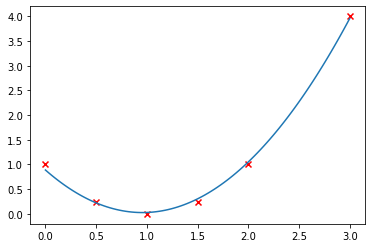

0.02157623835671022 0.9412096176581113 -1.800503759391267 0.8884775869518914


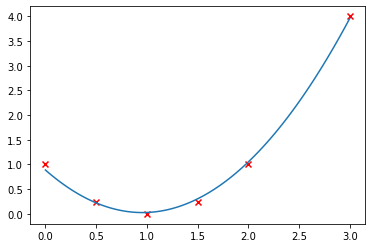

0.02155952352111863 0.9412323941483673 -1.8005810479544215 0.8885207928139514


In [14]:
Lr=0.0005 #  
Iteration=6000
for i in range(Iteration):
  
  Th0,Th1,Th2=GradientDecent(Th0,Th1,Th2,x_GT,y_GT,Lr)
  if i<Iteration-2:
    continue
  plt.scatter(x_GT, y_GT,marker='x', color='r')
  Y_p=Th0*xpoints*xpoints+Th1*xpoints+Th2
  plt.plot(xpoints, Y_p)
  plt.show()
  L=LossValue(Th0,Th1,Th2,x_GT,y_GT)
  print(L,Th0,Th1,Th2)